# Task : 1 Titanic Survival Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
titanic_data = pd.read_csv("tested.csv")
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Age and Cabin has Null values or blank....



In [7]:
#  we will fill blank with median value
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

In [8]:
# Count the Embarked
titanic_data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [9]:
# replace blanks with mode value
titanic_data['Embarked'].fillna('S', inplace=True)

In [10]:
# check Null value in data
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
# In fare column has also null value, replace with  median
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)

In [12]:
# We will remove the "Cabin" column because it contains a significant number of missing values.
titanic_data.drop(columns="Cabin", inplace=True)

In [13]:
# Last check null value and Dataset
print(titanic_data.isnull().sum())
print(titanic_data.head())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Embarked  
0   330911   7.8292        Q  
1   363272   7.0000        S  
2   240276   9.

## Now Data is Cleaned...



# Exploratory Data Analysis

#### survival variable describe as

0 = No, 1 = Yes



In [14]:
import seaborn as sns

In [15]:
titanic_data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

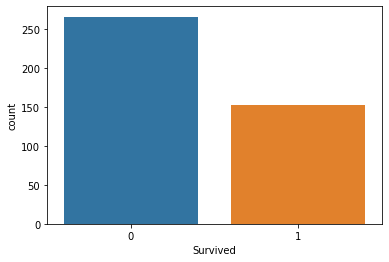

In [16]:
sns.countplot(data=titanic_data,x='Survived')

### Pclass data describe as:

- 1st = Upper
- 2nd = Middle
- 3rd = Lower



<AxesSubplot:xlabel='Pclass', ylabel='count'>

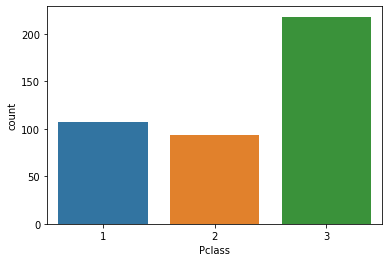

In [17]:
sns.countplot(data=titanic_data,x='Pclass')

<AxesSubplot:xlabel='Sex', ylabel='count'>

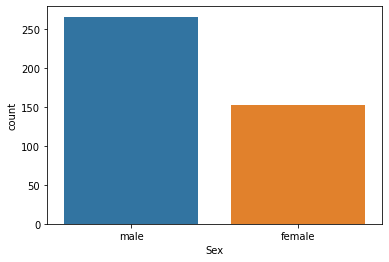

In [18]:
sns.countplot(data=titanic_data,x='Sex')

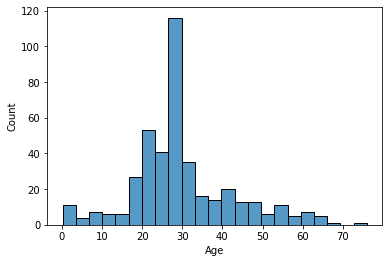

In [19]:
sns.histplot(data=titanic_data, x='Age')
plt.show()

## \# Show count of survival wrt pclass



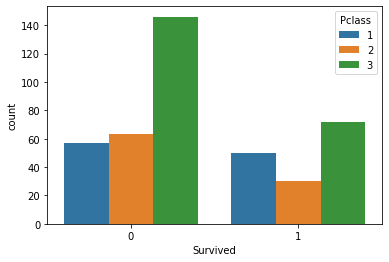

In [20]:
sns.countplot(x=titanic_data['Survived'], hue=titanic_data['Pclass'])
plt.show()

## \# Show count of survival wrt gender



In [21]:
titanic_data['Sex'].head()

0      male
1    female
2      male
3      male
4    female
Name: Sex, dtype: object

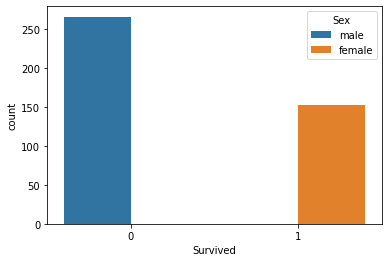

In [22]:
sns.countplot(x=titanic_data['Survived'], hue=titanic_data['Sex'])
plt.show()

### show survival wrt Age



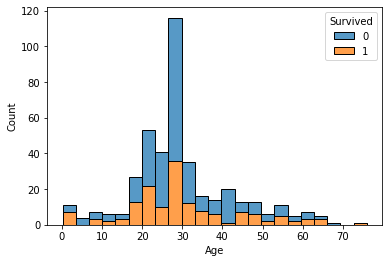

In [23]:
sns.histplot(x=titanic_data['Age'], hue=titanic_data['Survived'], multiple='stack')
plt.show()

### show survived wrt Embarked..

Port of Embarkation	

- C = Cherbourg,
- Q = Queenstown, 
- S = Southampton



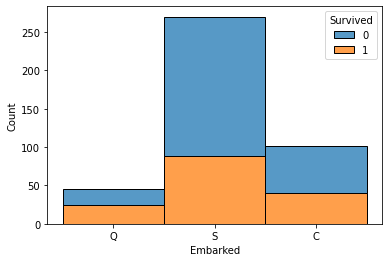

In [24]:
sns.histplot(x=titanic_data['Embarked'], hue=titanic_data['Survived'], multiple='stack')
plt.show()

### Show survival wrt to Fare



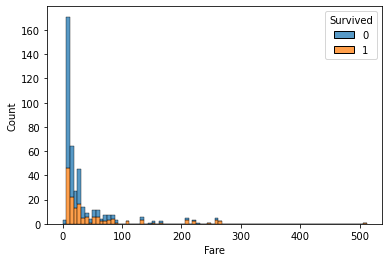

In [25]:
sns.histplot(x=titanic_data['Fare'], hue=titanic_data['Survived'], multiple='stack')
plt.show()

## Featuring Engineering



#### before modeling the data, transform gender\(Sex\) into numeric

- Male \- 1
- Female \- 0

**Use LabelEncoder from sklearn library**



In [26]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
titanic_data['Sex'] = labelencoder.fit_transform(titanic_data['Sex'])

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S


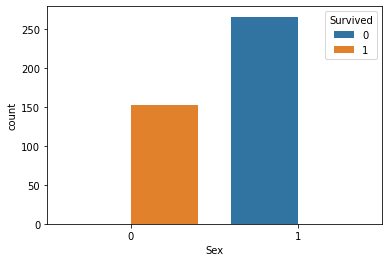

In [27]:
sns.countplot(x=titanic_data['Sex'],hue=titanic_data['Survived'])
plt.show()

#### Drop unneccasey column for modeling



In [28]:
titanic_data.drop(columns=["PassengerId","Name","SibSp","Parch","Ticket","Fare","Age", "Embarked"],inplace=True)

In [29]:
titanic_data.head()

,Survived,Pclass,Sex
0,0,3,1
1,1,3,0
2,0,2,1
3,0,3,1
4,1,3,0


## Modeling



In [30]:
X=titanic_data[['Sex', 'Pclass']]
Y=titanic_data['Survived']

##### Split data into test and train by using Sklearn library



In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

#### Create training Model



In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
log = LogisticRegression(random_state = 0)
log.fit(X_train, Y_train)

LogisticRegression(random_state=0)

#### create Prediction model



In [33]:
pred = log.predict(X_test)
pred

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [34]:
print("Accuracy_score :", accuracy_score(Y_test, pred))
print("Matrix :",confusion_matrix(Y_test,pred))

Accuracy_score : 1.0
Matrix : [[45  0]
 [ 0 39]]


In [35]:
Y_test

360    0
170    0
224    1
358    0
309    1
      ..
100    1
7      0
22     1
68     0
328    0
Name: Survived, Length: 84, dtype: int64

In [36]:
submission=X.iloc[:,:].values
y_final=log.predict(submission)

In [37]:
y_final.shape

(418,)

In [38]:
final = pd.DataFrame()
final["Sex"]= X['Sex']
final["survived"]=y_final

In [39]:
final.to_csv("submission.csv",index=False)

##### Trainig is completed, now check



#### predict\(\[\[ Pclass, Sex \]\]\) =&gt; survived or not survived



In [40]:
import warnings
warnings.filterwarnings("ignore")

result = log.predict([[5,0]])
if(result == 0):
    print("So soory, Not Survived")
else:
    print("Survived")

So soory, Not Survived
